逻辑回归预测芯片的良率

In [1]:
# load data;visualize date, generate new data
#establish model and train it, predict
#accuracy
#decision boundary
#define f(x)

In [2]:
#Logistic Regression
import numpy as np
import pandas as pd
data = pd.read_csv('./data/Logic_Regression/chip_test.csv')
print(data.shape)
data.head()

(118, 3)


,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [3]:
#add label mask
mask = data.loc[:,'pass']==1
print(mask)

0       True
1       True
2       True
3       True
4      False
       ...  
113    False
114    False
115    False
116    False
117    False
Name: pass, Length: 118, dtype: bool


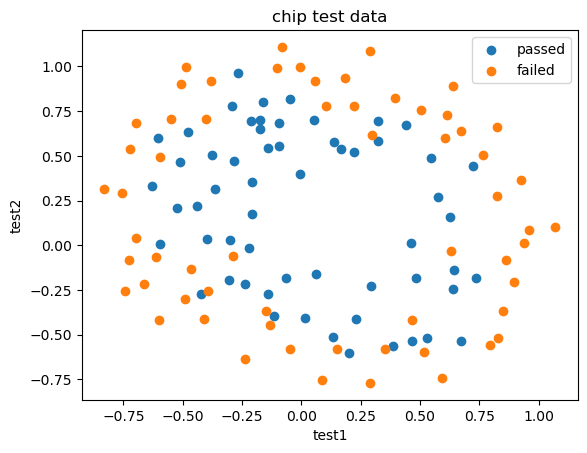

In [4]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.Figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.legend((passed,failed),('passed','failed'))
plt.title('chip test data')
plt.xlabel('test1')
plt.ylabel('test2')
plt.show()

In [5]:
#generalx,y and new data
x = data.drop('pass',axis=1)
y = data.loc[:,'pass']
x1 = data.loc[:,'test1']
x2 = data.loc[:,'test2']
x1_2 = x1 * x1
x2_2 = x2 * x2
x1_x2 = x1 * x2
x_new = {'x1':x1,'x2':x2,'x1_2':x1_2,'x2_2':x2_2,'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new)

           x1        x2      x1_2      x2_2     x1_x2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [6]:
#train the model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_new,y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [7]:
# Accurancy test
from sklearn.metrics import accuracy_score
y_predict = LR.predict(x_new)
accuracy = accuracy_score(y_predict, y)
print(accuracy)

0.8135593220338984


In [8]:
#fomulate the function
x1_new = x1.sort_values()
theta0 = LR.intercept_
theta1,theta2,theta3,theta4,theta5=LR.coef_[0][0],LR.coef_[0][1],LR.coef_[0][2],LR.coef_[0][3],LR.coef_[0][4]
a = theta4
b = theta5*x1_new + theta2
c = theta0+theta1*x1_new +theta3*x1_new*x1_new
x2_new_boundary = (-b + np.sqrt(b*b-4*a*c))/(2*a)
print(x2_new_boundary)

112   NaN
86    NaN
84    NaN
111   NaN
113   NaN
       ..
70    NaN
65    NaN
68    NaN
67    NaN
101   NaN
Name: test1, Length: 118, dtype: float64


/opt/anaconda3/envs/AI/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


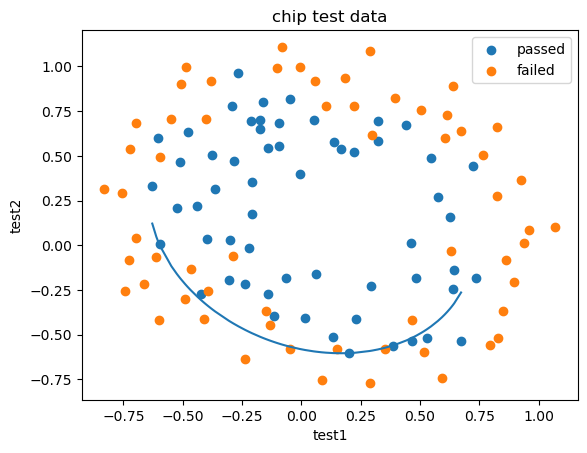

In [9]:
#visualize the data
fig2 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.legend((passed,failed),('passed','failed'))
plt.title('chip test data')
plt.xlabel('test1')
plt.ylabel('test2')
plt.plot(x1_new,x2_new_boundary)
plt.show()

In [10]:
#define fx
def f(x):
    a = theta4
    b = theta5*x + theta2
    c = theta0+theta1*x +theta3*x*x
    x2_new_boundary1 = (-b + np.sqrt(b*b-4*a*c))/(2*a)
    x2_new_boundary2 = (-b - np.sqrt(b*b-4*a*c))/(2*a)
    return x2_new_boundary1,x2_new_boundary2

In [11]:
x2_new_boundary1 = []
x2_new_boundary2 = []
for x in x1_new:
    x2_new_boundary1.append(f(x)[0])
    x2_new_boundary2.append(f(x)[1])
#print(x2_new_boundary1,x2_new_boundary2)

/var/folders/ds/j8tk9r0n0gl_921l_8sqysqr0000gp/T/ipykernel_3610/2785786370.py:6: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary1 = (-b + np.sqrt(b*b-4*a*c))/(2*a)
/var/folders/ds/j8tk9r0n0gl_921l_8sqysqr0000gp/T/ipykernel_3610/2785786370.py:7: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary2 = (-b - np.sqrt(b*b-4*a*c))/(2*a)


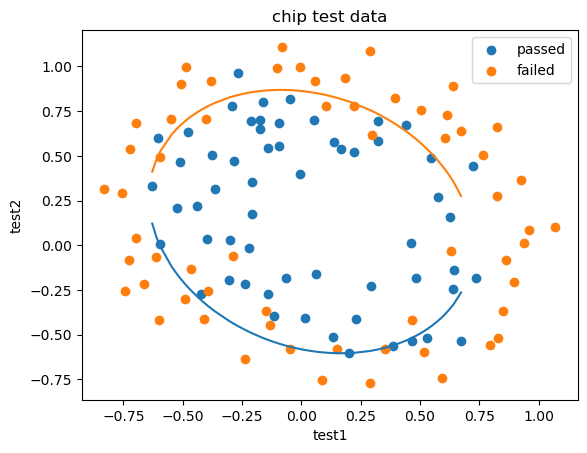

In [12]:
fig3 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.legend((passed,failed),('passed','failed'))
plt.title('chip test data')
plt.xlabel('test1')
plt.ylabel('test2')
plt.plot(x1_new,x2_new_boundary1)
plt.plot(x1_new,x2_new_boundary2)

plt.show()

/var/folders/ds/j8tk9r0n0gl_921l_8sqysqr0000gp/T/ipykernel_3610/2785786370.py:6: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary1 = (-b + np.sqrt(b*b-4*a*c))/(2*a)
/var/folders/ds/j8tk9r0n0gl_921l_8sqysqr0000gp/T/ipykernel_3610/2785786370.py:7: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary2 = (-b - np.sqrt(b*b-4*a*c))/(2*a)


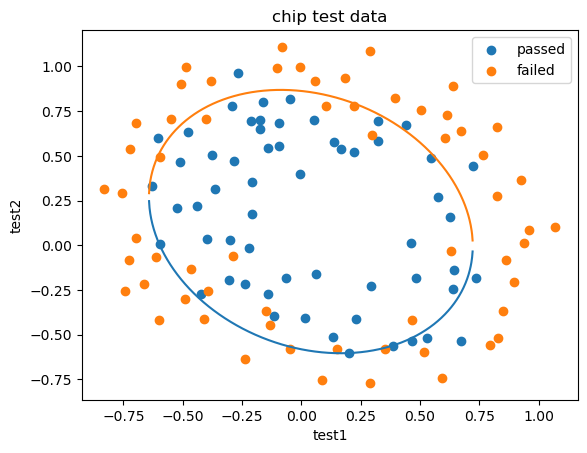

In [13]:
#general new data
x1_range = [-0.9 + x/1000 for x in range(0,190000)]
x1_range = np.array(x1_range)
x2_new_boundary1 = []
x2_new_boundary2 = []
for x in x1_range:
    x2_new_boundary1.append(f(x)[0])
    x2_new_boundary2.append(f(x)[1])
fig4 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(x1_range,x2_new_boundary1)
plt.plot(x1_range,x2_new_boundary2)
plt.legend((passed,failed),('passed','failed'))
plt.title('chip test data')
plt.xlabel('test1')
plt.ylabel('test2')
plt.show()